# Day 2: Ex­plor­at­ory Data Ana­lys­is - Feature Cor­rel­a­tion
- **Task**: Ana­lyse fea­ture cor­rel­a­tions with­in the data­set.
- **De­scrip­tion**: Cal­cu­late cor­rel­a­tion coef­fi­cients between nu­mer­ic­al features and visu­al­ise the cor­rel­a­tion mat­rix us­ing a heat map. Identi­fy highly cor­rel­ated fea­tures and con­sider their im­pact on the ana­lys­is. 

# Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [103]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- **Fixed acidity**: The amount of non-volatile acids in the wine, typically measured in grams per liter (g/L).

- **Volatile acidity**: The amount of volatile acids in the wine, which can contribute to unpleasant flavors, typically measured in g/L.

- **Citric acid**: The amount of citric acid in the wine, which can impart freshness and flavor, typically measured in g/L.

- **Residual sugar**: The amount of sugar remaining in the wine after fermentation, typically measured in g/L.

- **Chlorides**: The amount of salt in the wine, which can influence taste and mouthfeel, typically measured in g/L.

- **Free sulfur dioxide**: The amount of sulfur dioxide present in free form, which acts as a preservative and antimicrobial agent, typically measured in parts per million (ppm).

- **Total sulfur dioxide**: The total amount of sulfur dioxide present in the wine, including both free and bound forms, typically measured in ppm.

- **Density**: The density of the wine, which can be influenced by sugar content and alcohol level, typically measured in g/cm³.

- **pH**: The acidity level of the wine, which can affect its taste and stability, measured on a scale from 0 to 14, with lower values indicating higher acidity.

- **Sulphates**: The amount of sulfur dioxide in the wine, which can contribute to its antioxidant properties and preservation, typically measured in g/L.

- **Alcohol**: The alcohol content of the wine, typically measured as a percentage of volume.

- **Quality**: The quality rating of the wine, which is often a subjective assessment provided by experts or consumers.

# Data Cleaning

In [104]:
# Obtain dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [105]:
# .describe() to obtain the summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# NaN Values

In [106]:
# Count NaN values in each column
nan_values_count = df.isna().sum()

print("\nCount of NaN values in each column:")

# Print the result
print(nan_values_count)


Count of NaN values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# What Does This Mean?

- From here we can see that there are no NaN or missing values in our dataset.
- All data points are represented are numerical, with only quality being an integer whilst every other column features data points as floats.

# Calculate Correlation Matrix

- Once the data is loaded in VSCode, we can calculate the correlation matrix using the .corr() method in pandas.

In [107]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visulise Correlation Matrix

- We can now visulaise the correlation matrix using heatmaps provided by seaborn.

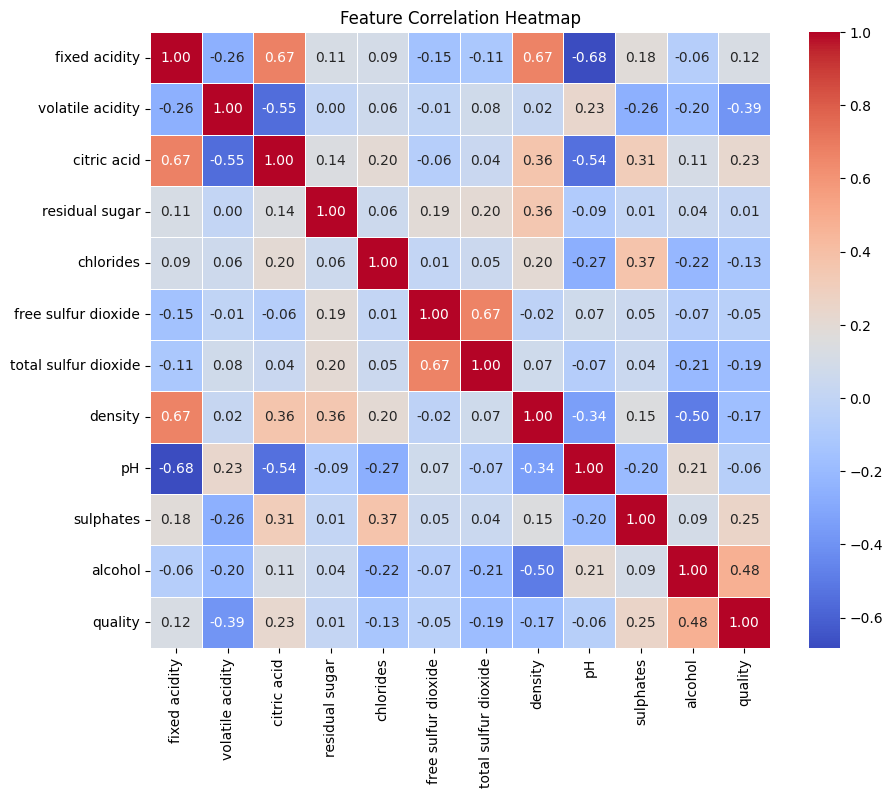

In [108]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and display the plot
plt.title('Feature Correlation Heatmap')
plt.show()

# What Does this Mean?

- This will create a heatmap visualisation of the correlation matrix, 
- Where each cell represents the correlation coefficient between two features. 
- The color intensity indicates the strength and direction of the correlation.


# Let's Explore

- Let's take a look at the highest and lowest correlation values.

In [109]:
# Extract the lowest correlation
correlation_between_features = correlation_matrix.loc['pH', 'fixed acidity']
print("Correlation between pH and fixed acidity:", correlation_between_features)

Correlation between pH and fixed acidity: -0.6829781945685302


- **Correlation between pH and fixed acidity**: The correlation coefficient between pH and fixed acidity is approximately -0.683. This indicates a moderately strong negative correlation between these two variables. A negative correlation suggests that as one variable (pH) increases, the other variable (fixed acidity) tends to decrease, and vice versa. In this case, it means that wines with higher fixed acidity tend to have lower pH levels, and wines with lower fixed acidity tend to have higher pH levels.

In [110]:
# Extract the highest correlation for two diffferent features
correlation_between_features = correlation_matrix.loc['density', 'fixed acidity']
print("Correlation between density and fixed acidity:", correlation_between_features)

Correlation between density and fixed acidity: 0.6680472921189573


- **Correlation between density and fixed acidity**: The correlation coefficient between density and fixed acidity is approximately 0.668. This indicates a moderately strong positive correlation between these two variables. A positive correlation suggests that as one variable (density) increases, the other variable (fixed acidity) also tends to increase, and vice versa. In this case, it means that wines with higher fixed acidity tend to have higher density, and wines with lower fixed acidity tend to have lower density.